In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import requests
import json
from bs4 import BeautifulSoup
import geopy
from geopy.geocoders import Nominatim

# 1. Goal

What are the best locations in North Carolina (NC) to buy a home/condo? 
What are the best home/condo options in the selected areas? 

# 2. Criteria for finding best location

https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp

- Stable real-estate value appreciation
 - Look at historical housing market appreciation (10 years after 2008 crash)
- Look at increase in population over the past 5 years
- Look at the number of new houses in the area
- Look at number of new companies moving into an area 
- Look at the number of universities and schools in the area
- Look at the number of airports in the area
- Look at the number of restaurants, bars, coffee shops, retailers in the area

# 3. Criteria for finding the best home/condo? 

- Condo
- Price below 500k
- At least 2 bedrooms
- HOA fees below $1000/month

# 4. What determines the price of a house? 

https://www.opendoor.com/w/blog/factors-that-influence-home-value

1. Neighborhood comps
2. Location
3. Home size and usable space
4. Age and condition
5. Upgrades and updates
6. Local market
7. Economic indicators
8. Interest rates


# 5. Real estate data sources


# 6. Neighborhoods in Durham

1. What are the best neighborhoods in Durham in terms for investment and rental properties? 
2. How do the neighborhoods in Durham compare to ones in other major cities such as Raleigh, Chapel Hill, Morrisville, Cary, Charlotte, Greensboro and Winston-Salem? 
3. How do the best neighborhoods in Durham compare to the best neighborhoods in other states? 

## 6.1 Extract neighborhood names in Durham

- https://durhamhoods.com/

In [2]:
#Retrieving XML response containing Durham neighborhoods information
url = "https://durhamhoods.com/"
response = requests.get(url)
bs = BeautifulSoup(response.content,'lxml')
#search = bs.find_all('li')

#Extracting data in 'ul' tag which contains neighborhood names
ul_list = bs.find_all('ul')

data = []

for item in ul_list: 
  if item.get('class'):
    if "blogroll" in item.get('class'):
      data = item
    else: 
      continue

#Extracting individual neighborhoods and storing them in a list
li_list = data.find_all('li')

neighborhoods = []

for item in li_list: 
  neighborhoods.append(item.find('a').text)

print (neighborhoods)

['Abercromby', 'Abron Drive', 'Albright', 'Amberlynn Valley', 'American Tobacco Campus', 'American Village', 'Anderson St. / Wrightwood Park', 'Archer Woods', 'Arrowhead', 'Artisan at Brightleaf', 'Ashley Forest', 'Ashton Hall', 'Auburn', 'Auburn Hills', 'Auburn Park', 'Auburn Square', 'Audubon Park', 'Autumn Ridge', 'Bahama', 'Barclay to Sandlewood', 'Belcrest', 'Bennet Place', 'Bent Creek / Woodberry Forest', 'Bluffs of the Eno', 'Bon Air Avenue', 'Bradbury Glen', 'Bradbury Trace', 'Bradford', 'Bragtown', 'Brandon Ridge', 'Briarcliff', 'Brightleaf at the Park', 'Brightwood Trails', 'Brookstown', 'Buck Crossing', 'Burch Avenue', 'Cameron Woods', 'Cardinal Lake', 'Carillon Forest', 'Carolina Arbors', 'Central Park', "Chancellor's Ridge", 'Chapel Hill Road', 'Chelsea Meadows', 'Cleveland Holloway', 'Colchester', 'Cole Mill Road', 'Coles Pond', 'College View', 'Colonial Village', 'Colony Hill', 'Colony Park', 'Colony Woods', 'Colvard Farms', 'Copper Creek', 'Country Club Heights', 'Cranf

## 6.2 Retrieve geographical coordinates for each neighborhood

In [3]:
#Extracting sample coordinates for a given location
address = 'Abercromby, Durham, North Carolina'

geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ',address,' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Abercromby, Durham, North Carolina  are 35.9305379, -78.8951339.


In [4]:
#Finding the coordinates for each neighborhood
lat = []
long = []
count = 0
good_returns = 0
bad_returns = 0
null_neighborhoods = []

for i in neighborhoods:
    location = geolocator.geocode(i.strip()+", Durham, North Carolina",timeout=10)
    try:
        good_returns = good_returns + 1
        latitude = location.latitude
        longitude = location.longitude
        lat.append(latitude)
        long.append(longitude)
        count = count + 1
        if count == 20:
          print ()
          print ("And so on....")
        elif count > 20: 
          pass
        else:
          print (i,latitude,longitude)
    except:
        null_neighborhoods.append(i)
        bad_returns = bad_returns + 1
        latitude = 998
        longitude = 999
        lat.append(latitude)
        long.append(longitude)
        count = count + 1
        if count == 20:
          print ()
          print ("And so on....")
        elif count > 20: 
          pass
        else:
          print (i,latitude,longitude)

print ()
print ("Number of neighborhoods for which the coordinates were successfully found:",good_returns)
print ("Number of neighborhoods for which the coordinates were not found:",bad_returns)
print ()
print ("These are the neighborhoods missing coordinates:")

for i in null_neighborhoods:
  print(i) 

Abercromby 35.9305379 -78.8951339
Abron Drive 35.8980667 -78.9490205
Albright 998 999
Amberlynn Valley 998 999
American Tobacco Campus 35.99479205 -78.90463781810374
American Village 36.0197482 -78.9711834
Anderson St. / Wrightwood Park 35.9888115 -78.93422273516074
Archer Woods 36.0448831 -78.9706922
Arrowhead 35.9992575 -78.9860774
Artisan at Brightleaf 998 999
Ashley Forest 998 999
Ashton Hall 998 999
Auburn 35.917257500000005 -78.9136132208005
Auburn Hills 35.9128978 -78.9100317
Auburn Park 35.9150128 -78.9134742
Auburn Square 35.9155897 -78.9160264
Audubon Park 35.8805154 -78.9041442
Autumn Ridge 36.085813 -78.939613
Bahama 36.1659763 -78.8766738

And so on....

Number of neighborhoods for which the coordinates were successfully found: 239
Number of neighborhoods for which the coordinates were not found: 53

These are the neighborhoods missing coordinates:
Albright
Amberlynn Valley
Artisan at Brightleaf
Ashley Forest
Ashton Hall
Belcrest
Bennet Place
Bent Creek / Woodberry Forest


In [5]:
#Storing neighborhoods and coordinates in a dataframe
df_neighborhoods = pd.DataFrame()
df_neighborhoods['neighborhood'] = neighborhoods
df_neighborhoods['latitude'] = lat
df_neighborhoods['longitude'] = long
df_neighborhoods.head()

,neighborhood,latitude,longitude
0,Abercromby,35.930538,-78.895134
1,Abron Drive,35.898067,-78.949021
2,Albright,998.000000,999.000000
3,Amberlynn Valley,998.000000,999.000000
4,American Tobacco Campus,35.994792,-78.904638


In [6]:
#Creating a new dataframe without the missing coordinates
df_plot = df_neighborhoods[df_neighborhoods['latitude']!=998]
df_plot.index = list(range(df_plot.shape[0]))
df_plot.shape

(186, 3)

Text(0.5, 1.0, 'Mapping of neighborhood names and coordinates')

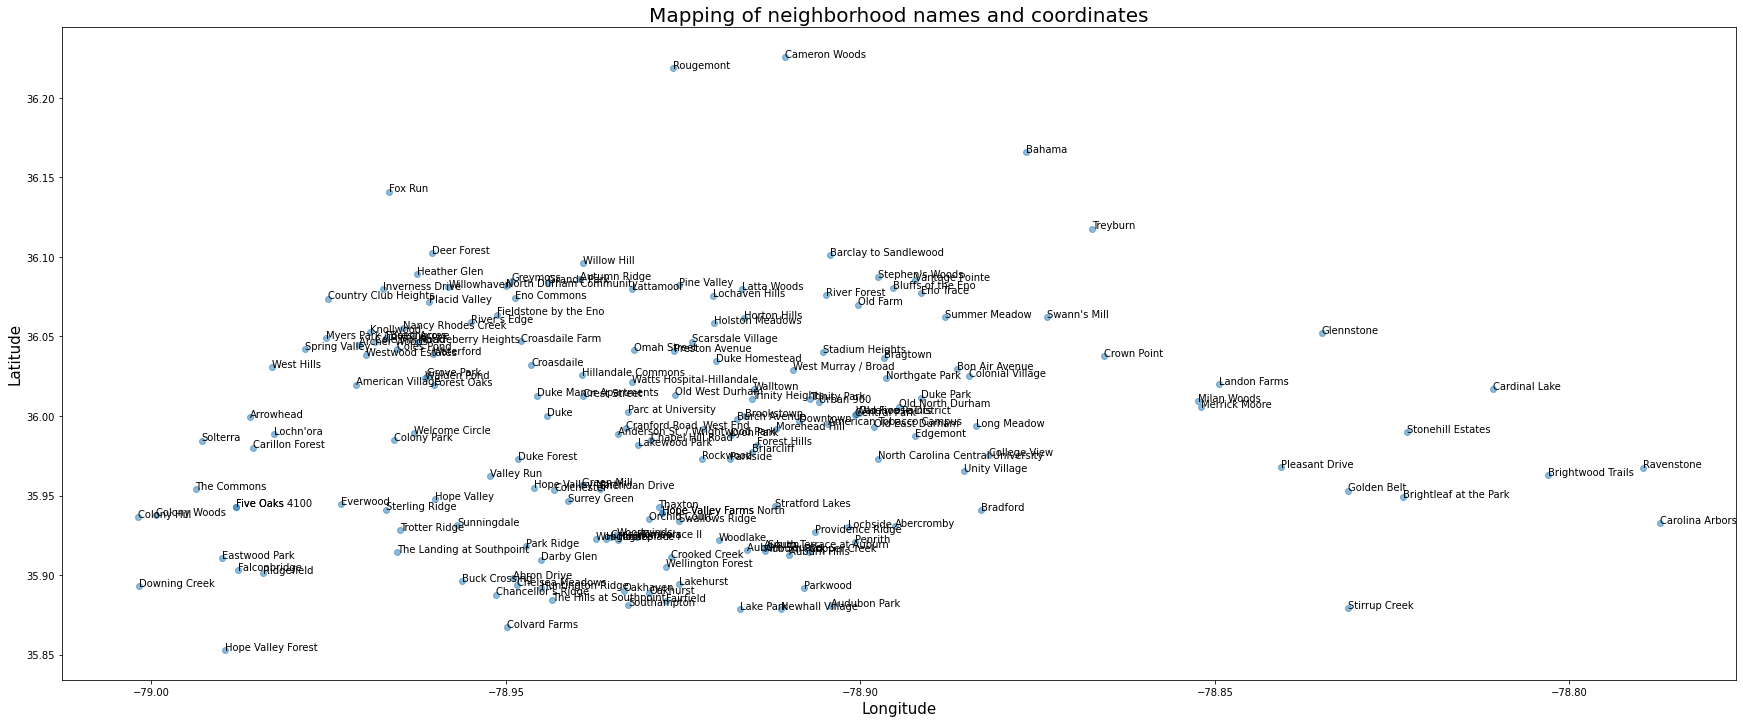

In [7]:
plt.figure(figsize=(30,12))
plt.scatter(df_plot['longitude'],df_plot['latitude'],alpha=0.5)
for i in df_plot.index:
  plt.annotate(df_plot['neighborhood'].iloc[i],xy=(df_plot['longitude'].iloc[i],df_plot['latitude'].iloc[i]),xytext=(df_plot['longitude'].iloc[i],df_plot['latitude'].iloc[i]))
plt.xlabel('Longitude',size=15)
plt.ylabel('Latitude',size=15)
plt.title('Mapping of neighborhood names and coordinates',size=20)